# Polynomial Regression (다항 회귀)

- 데이터를 표현함에 있어서 선형이 아닌 <U>곡선</U> 으로 나타나는 경우에 사용한다.
- 다항 회귀는 '항(차수, degree)'이 많다는 것.
<br> <br>
- 차수를 높이면 기존 모델보다 더 적은 오차를 만들어 낸다는 장점 ( $ R^2 $ 값 증가)
- 다항회귀는 1개의 독립 변수를 이용해 **차수(degree)** 를 높인다.
- feature에 대한 데이터를 변형시켜 다항으로 표현 ( $ W_1 * f + W_2 * f^2 + ... + b $ )

## 데이터 준비

In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     ) # 농어 길이에 해당하는 값의 리스트 - np.array에 전달

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     ) # 농어 무게에 해당하는 값의 리스트 - np.array에 전달

In [2]:
from sklearn.model_selection import train_test_split
    # 훈련/ 테스트 세트 나누기 위해 scikit-learn에서 train_test_split 호출

train_X, test_X, train_y, test_y = train_test_split(perch_length, perch_weight, random_state = 42)
    # 훈련/ 테스트 세트 나누기
    # X (feature) = length, y (target) = weight

print(train_X.shape, test_X.shape) # 기존 데이터가 1차원 배열이었기 때문에 1차원 배열의 훈련/테스트 데이터
print(train_X, test_X, sep = '\n') # 확인

(42,) (14,)
[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]
[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]


**머신러닝에서 column = target (y 값), row = feature data (X 값)으로 보기 때문에, target data (y)는 1차원 배열, feature data (X 값)는 2차원 배열을 가져야 한다.**

In [3]:
train_X = train_X.reshape(-1, 1) # 2차원 배열로 reshape
test_X = test_X.reshape(-1, 1)

print(train_X.shape, test_X.shape) # 2차원 배열 확인

(42, 1) (14, 1)


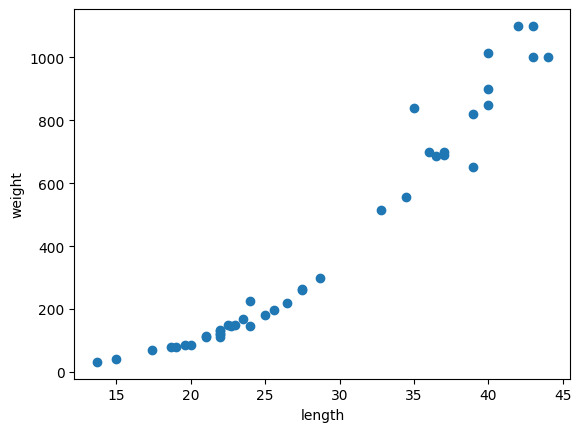

In [4]:
import matplotlib.pyplot as plt

plt.scatter(train_X, train_y)
plt.xlabel('length')
plt.ylabel('weight')
plt.show() # 그래프가 곡선 형태인 것 확인

## 모델학습

In [5]:
from sklearn.linear_model import LinearRegression
    # 다항회귀 사용할 때에도 선형회귀 호출!

# 차수를 높일 때 특징으로 존재하는 독립변수를 제곱한 항을 데이터에 추가해야 한다.
# 지금의 경우에는 '길이'를 이용해 '무게'를 예측할 것이니까 '길이'를 제곱한 항을 추가해야 한다.
# np.column_stack(([a, b])): 두 개의 1차원 배열을 칼럼/세로/열 방향으로 붙여서 2차원 배열로 만드는 넘파이 기능

train_poly = np.column_stack((train_X**2, train_X))
test_poly = np.column_stack((test_X**2, test_X))

print(train_X.shape, test_X.shape)

(42, 1) (14, 1)


In [6]:
lr = LinearRegression() # 모델 객체 정의
lr.fit(train_poly, train_y) # 모델 학습

LinearRegression()

In [7]:
print(lr.predict([[100**2, 100]])) # 길이 100cm의 농어 몸무게 예측하기
    # 다항 회귀에서 특징을 제곱한 항을 추가해주었기 때문에 예측할 때에도 [[특징값을 제곱한 항, 특징값]] 넣어주기

[8103.57880667]


In [8]:
print(lr.score(train_poly, train_y))
print(lr.score(test_poly, test_y))

# 모델 정확도 비교하기 위해 훈련/테스트 세트의 정확도 확인

0.9706807451768623
0.9775935108325121


**테스트 세트가 더 높은 점수로 나와 약간의 과소적합**

In [9]:
print(lr.coef_, lr.intercept_) # y = (lr.coef_)x**2 + (lr.coef_)x + (lr.intercept_)의 곡선을 구할 것

[  1.01433211 -21.55792498] 116.05021078278259


In [10]:
print(train_poly.shape, train_y.shape)

(42, 2) (42,)


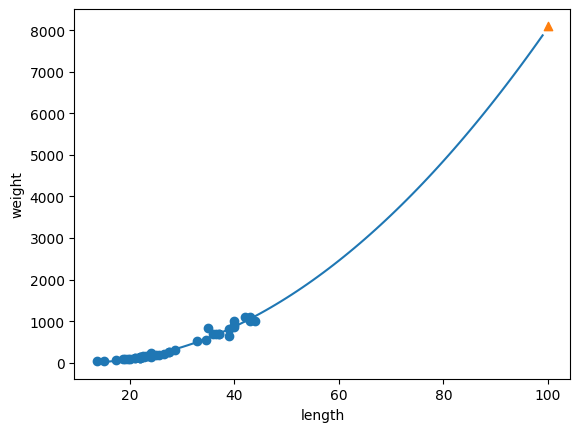

In [11]:
# 그래프 그려보기

point = np.arange(15, 100) # 구간별 직선을 그리기 위해 15부터 99까지의 정수 배열 만들기
plt.scatter(train_X, train_y)
plt.plot(point, 1.01 * point**2 + (-21.6) * point + 116.05) # 15에서 99까지 2차 방정식 그래프 그리기
        # plt.plot(x, y)
        # x = point
        # y = (lr.coef_)x**2 + (lr.coef_)x + (lr.intercept_)
plt.xlabel('length')
plt.ylabel('weight')
plt.scatter(100, 8103, marker = '^')
plt.show()

**위의 다항회귀 예시에서 생선의 길이라는 하나의 특징에 차수를 부여해 하나의 특징을 더 만들어냈다. 이처럼 차수가 1인 생선의 길이라는 단순한 특징을 제곱하여 또 다른 특징을 만들어 낼 수 있다.**
- 여러 특징이 있을 때 정확도 높아진다.
- 너무 많은 차수를 사용하면 overfitting 가능성 높아질 수 있다.
- overfitting 막으면서 차수를 적절히 조절할 수 있는 Ridge, Lasso라는 규제 클래스가 있다.

## 연습

In [31]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     ) # 농어 길이에 해당하는 값의 리스트 - np.array에 전달

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     ) # 농어 무게에 해당하는 값의 리스트 - np.array에 전달

In [32]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

train_data = train_data.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)

print(train_data.shape, test_data.shape)

(42, 1) (14, 1)


In [33]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_data, train_target)
lr.score(train_data, train_target)

0.939846333997604

In [34]:
lr.score(test_data, test_target)

0.8247503123313558

In [36]:
lr.predict([[50]])

array([1241.83860323])

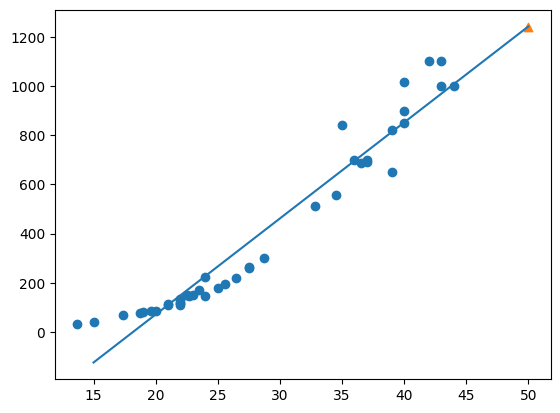

In [37]:
import matplotlib.pyplot as plt

plt.scatter(train_data, train_target)
plt.plot([15, 50], [lr.coef_ * 15 + lr.intercept_, lr.coef_ * 50 + lr.intercept_])
plt.scatter(50, 1241, marker = '^')
plt.show()

In [40]:
train_poly = np.column_stack((train_data**2, train_data))
test_poly = np.column_stack((test_data**2, test_data))

In [41]:
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9706807451768623

In [42]:
lr.score(test_poly, test_target)

0.9775935108325121

In [44]:
lr.predict([[50**2, 50]])

array([1573.98423528])

In [46]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


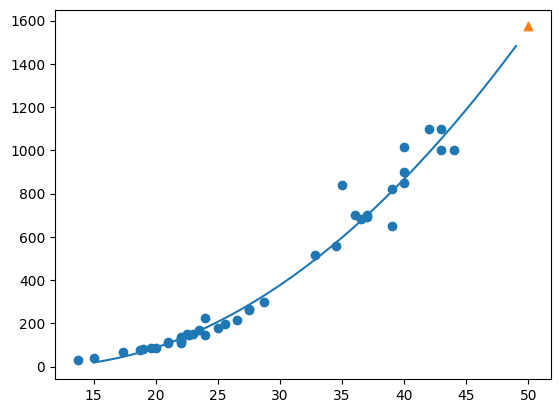

In [47]:
point = np.arange(15, 50)
plt.scatter(train_data, train_target)
plt.plot(point, 1.01 * point**2 + (-21.6) * point + 116.05)
plt.scatter(50, 1573, marker = '^')